<a href="https://colab.research.google.com/github/nathadriele/star-wars-data-visualization/blob/main/notebooks/starwars_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise Exploratória e Visualizações Interativas do Universo Star Wars: Relações, Hierarquias e Atributos dos Personagens**

*   1. **Boxplot** - Comparação do Número de Missões por Afiliação;
*   2. **Histogram with KDE** - Histogramas com Estimativa de Densidade Kernel;
*   3. **Treemap** - Composição Hierárquica de Espécies por Afiliação;
*   4. **Swarm Plot** - Distribuição de Personagens por Espécie e Afiliação;
*   5. **Heatmap** - Relação entre Espécies e Afiliações;
*   6. **Pairplot** - Relação entre Atributos Numéricos;
*   7. **Sunburst Chart** - Relação Hierárquica Entre Personagens, Espécies e Afiliações;
*   8. **Circular Packing Chart** - Representação de Hierarquias de Personagens por Afiliação e Espécie;
*   9. **Sankey Diagram** - Fluxo entre Espécies e Afiliações;
*   10. **Network Graph** - Relações Entre Personagens e Droides Companheiros;
*   11. **Parallel Coordinates Plot** - Comparação Entre Atributos dos Personagens;
*   12. **Bubble Chart** - Comparação de Afiliação e Espécie Usando o Tamanho das Bolhas;
*   13. **Violin Plot** - Distribuição de Conhecimento de Línguas por Afiliação;
*   14. **Strip Plot com Jitter** - Afiliações por Espécies;
*   15. **Donut Chart** - Distribuição de Espécies;
*   16. **Horizontal Bar Chart** - Número de Personagens por Afiliação;
*   17. **Trellis Chart (FacetGrid)** - Relação Entre Número de Missões e Conhecimento de Línguas por Afiliação;
*   18. **Lollipop Chart** - Comparação do Número de Personagens por Espécie;
*   19. **Marimekko Chart** - Relação Entre Espécie e Afiliação;
*   20. **Funnel Chart** - Introdução dos Personagens ao Longo dos Filmes;
*   21. **Density Contour Plot** - Visualizar Concentração de Atributos;
*   22. **Correlograma (Correlation Matrix Plot)** - Análise de Correlação Entre Atributos;
*   23. **Dumbbell Plot** - Comparação do Número de Personagens por Espécie Entre Dois Grupos;
*   24. **Radial Bar Chart** - Comparação dos Atributos dos Personagens;
*   25. **Streamgraph** - Evolução da Distribuição de Espécies ao Longo dos Filmes;
*   26. **Icicle Chart** - Análise de Hierarquia de Atributos do Universo Star Wars;
*   27. **Chord Diagram 3D** - Visualização de Conexões em Três Dimensões Entre Espécies, Afiliações e Planetas;
*   28. **Cluster Dendrogram** - Agrupamento dos Personagens com Base nos Atributos;
*   29. **Matrix Plot (Matriz de Bolhas)** - Relação de Personagens, Espécies e Afiliações;
*   30. **3D Scatter Plot** - Análise dos Atributos dos Personagens em um Gráfico Tridimensional.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt

dataset_path = '/content/data/star_wars_universe_dataset.csv'

df = pd.read_csv(dataset_path)

df.head(10)

,Name,Species,Homeworld,Affiliation,First Appearance,Weapon,Force Sensitive,Rank,Ship,Droid Companion,Mission Count,Lightsaber Color,Known Languages,Allegiance
0,Luke Skywalker,Human,Tatooine,Rebel Alliance,A New Hope,Blaster,True,Bounty Hunter,Y-Wing,IG-88,49,Blue,9,Rebels
1,Darth Vader,Human,Tatooine,Galactic Empire,A New Hope,Blaster,True,Padawan,X-Wing,IG-88,90,NaN,6,Neutral
2,Leia Organa,Human,Alderaan,Rebel Alliance,A New Hope,Vibroblade,False,Sith Lord,Millennium Falcon,Chopper,19,Green,6,Neutral
3,Han Solo,Human,Corellia,Rebel Alliance,A New Hope,Lightsaber,True,Bounty Hunter,A-Wing,Chopper,98,Blue,7,Sith
4,Obi-Wan Kenobi,Human,Stewjon,Jedi Order,A New Hope,Thermal Detonator,False,Jedi Master,Millennium Falcon,K-2SO,24,Blue,4,Neutral
5,Yoda,Yoda's species,Unknown,Jedi Order,The Empire Strikes Back,Vibroblade,False,General,Star Destroyer,IG-88,15,Red,5,Neutral
6,Anakin Skywalker,Human,Tatooine,Jedi Order,The Phantom Menace,Bowcaster,True,Captain,A-Wing,BB-8,30,Blue,1,Neutral
7,Padmé Amidala,Human,Naboo,Galactic Republic,The Phantom Menace,Blaster,False,Sith Apprentice,Y-Wing,K-2SO,17,Purple,2,Neutral
8,Palpatine,Human,Naboo,Sith,The Phantom Menace,Bowcaster,True,Jedi Master,TIE Fighter,C-3PO,86,Red,3,Rebels
9,Mace Windu,Human,Haruun Kal,Jedi Order,The Phantom Menace,Vibroblade,False,Jedi Master,Millennium Falcon,BB-8,78,Purple,2,Sith


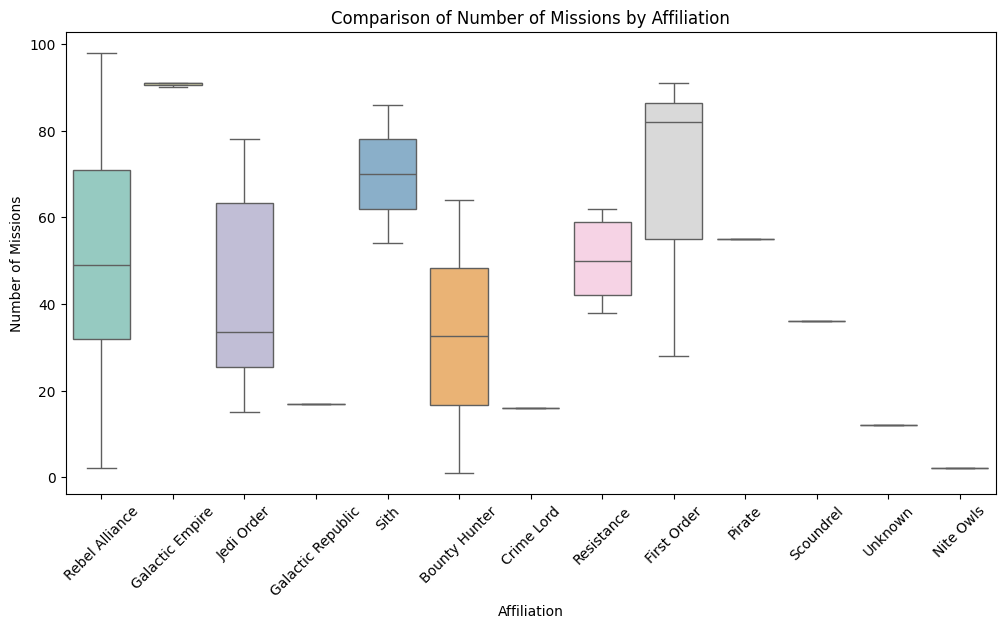

In [55]:
# 1. Boxplot - Comparação do Número de Missões por Afiliação

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Affiliation', y='Mission Count', hue='Affiliation', palette='Set3', dodge=False, showfliers=False)
plt.xlabel('Affiliation')
plt.ylabel('Number of Missions')
plt.title('Comparison of Number of Missions by Affiliation')
plt.xticks(rotation=45)

plt.legend([], [], frameon=False)

plt.show()

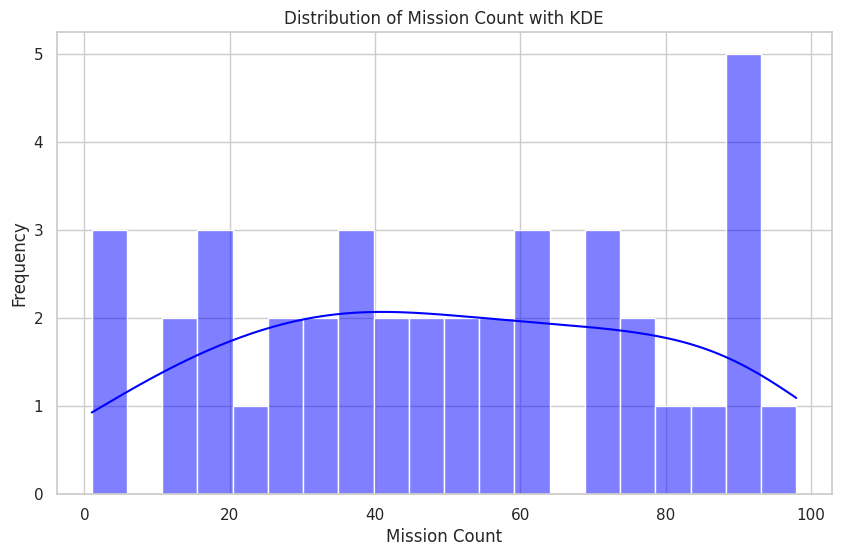

In [61]:
# 2. Histogram with KDE (Histogramas com Kernel Density Estimation)

plt.figure(figsize=(10, 6))
sns.histplot(df['Mission Count'], kde=True, color='blue', bins=20)
plt.xlabel('Mission Count')
plt.ylabel('Frequency')
plt.title('Distribution of Mission Count with KDE')
plt.show()

In [32]:
# 3. Treemap - Composição Hierárquica de Espécies por Afiliação

fig = px.treemap(df, path=['Affiliation', 'Species'], title='Species Composition by Affiliation')
fig.update_traces(textinfo='label+percent entry')
fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



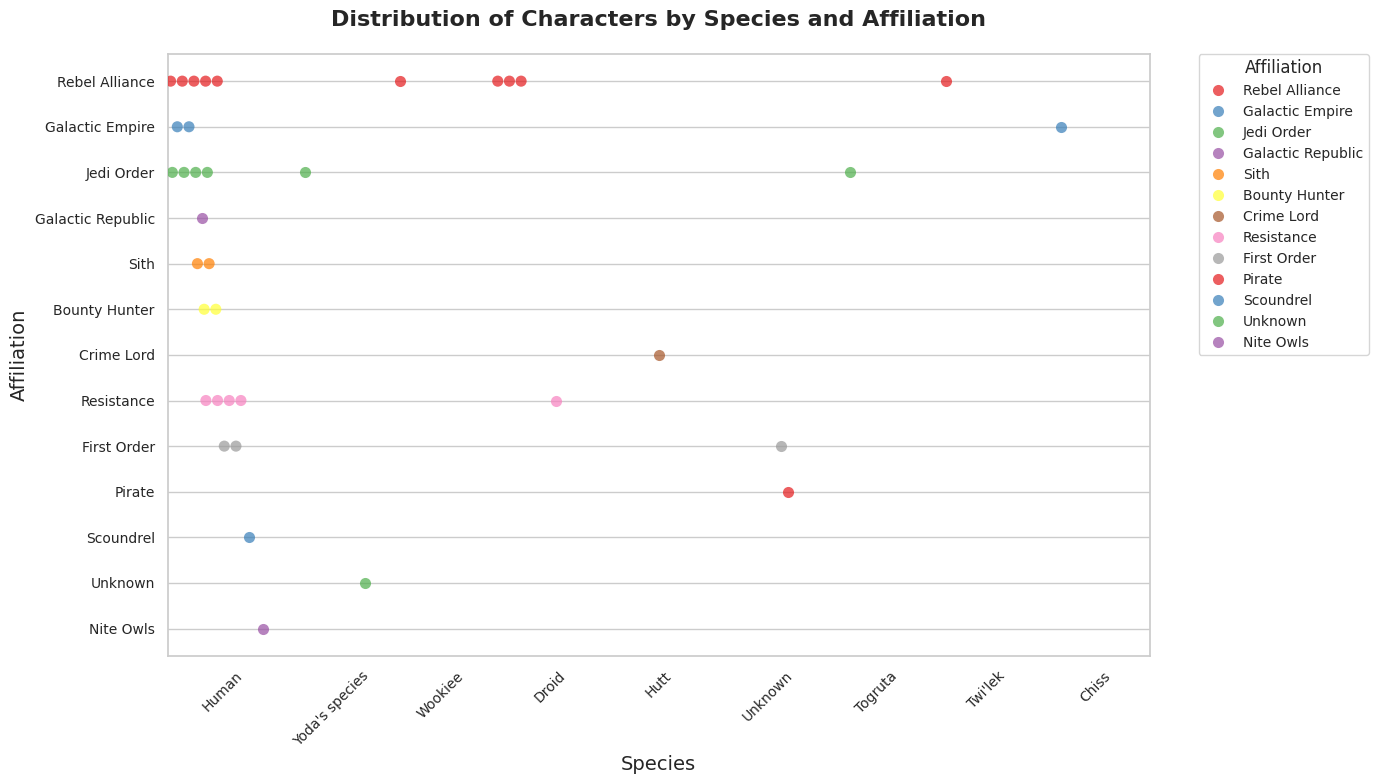

In [62]:
# 4. Swarm Plot - Distribuição de Personagens por Espécie e Afiliação

plt.figure(figsize=(14, 8))
sns.swarmplot(data=df, x='Species', y='Affiliation', hue='Affiliation', palette='Set1', size=8, dodge=True, alpha=0.7)

plt.xlabel('Species', fontsize=14)
plt.ylabel('Affiliation', fontsize=14)
plt.title('Distribution of Characters by Species and Affiliation', fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

plt.tight_layout()
plt.show()

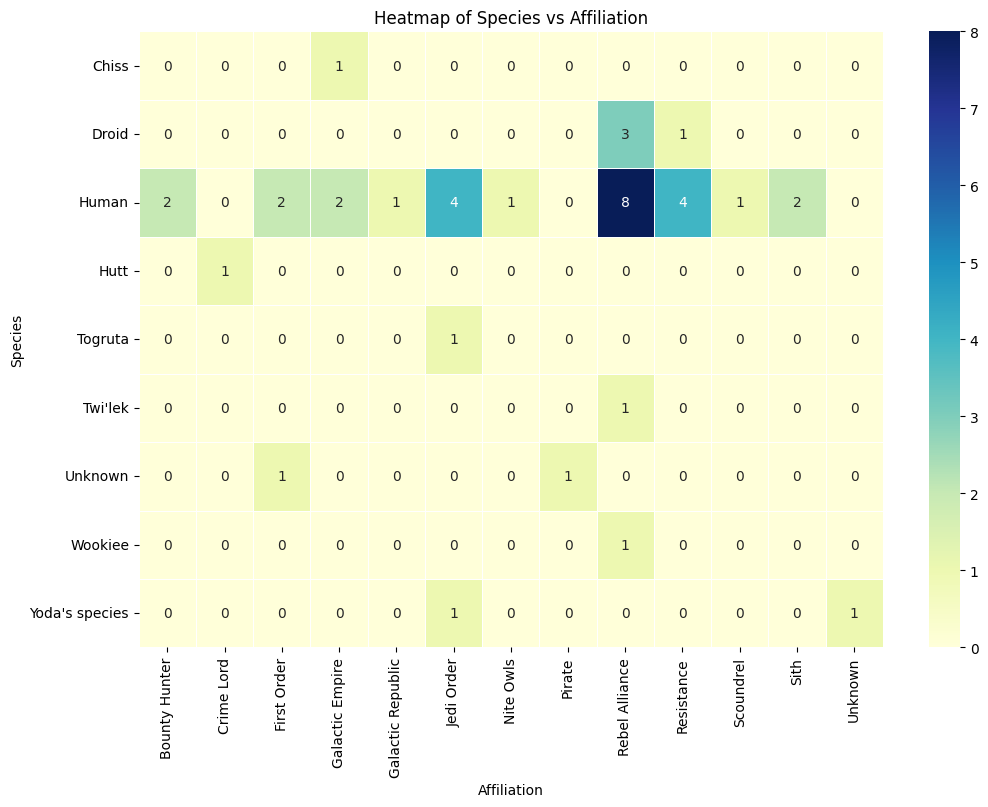

In [34]:
# 5. Heatmap - Relação entre Espécies e Afiliações

plt.figure(figsize=(12, 8))
species_affiliation = pd.crosstab(df['Species'], df['Affiliation'])
sns.heatmap(species_affiliation, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Species vs Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Species')
plt.show()

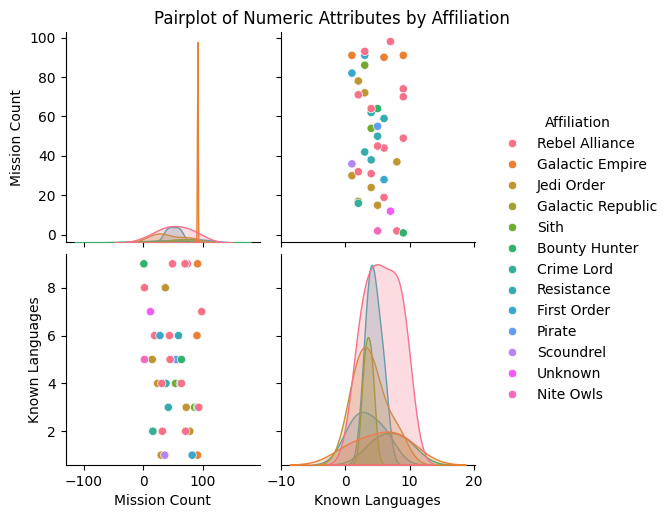

In [35]:
# 6. Pairplot - Relação entre Atributos Numéricos

sns.pairplot(df, vars=['Mission Count', 'Known Languages'], hue='Affiliation', palette='husl')
plt.suptitle('Pairplot of Numeric Attributes by Affiliation', y=1.02)
plt.show()

In [36]:
# 7. Sunburst Chart - Relação Hierárquica Entre Personagens, Espécies e Afiliações

fig = px.sunburst(df, path=['Affiliation', 'Species', 'Homeworld'], title='Character Distribution by Affiliation, Species, and Homeworld')
fig.update_traces(textinfo='label+percent entry')
fig.show()

In [37]:
# 8. Circular Packing Chart - Representação de Hierarquias de Personagens por Afiliação e Espécie

data = df.groupby(['Affiliation', 'Species']).size().reset_index(name='Count')

fig = px.sunburst(
    data,
    path=['Affiliation', 'Species'],
    values='Count',
    title='Circular Packing Chart - Distribuição Hierárquica dos Personagens por Afiliação e Espécie',
    color='Affiliation'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

In [38]:
# 9. Sankey Diagram - Fluxo entre Espécies e Afiliações

species_affiliation = df.groupby(['Species', 'Affiliation']).size().reset_index(name='Count')

species_labels = list(species_affiliation['Species'].unique())
affiliation_labels = list(species_affiliation['Affiliation'].unique())
labels = species_labels + affiliation_labels

species_map = {name: i for i, name in enumerate(species_labels)}
affiliation_map = {name: i + len(species_labels) for i, name in enumerate(affiliation_labels)}

sources = species_affiliation['Species'].map(species_map).tolist()
targets = species_affiliation['Affiliation'].map(affiliation_map).tolist()
values = species_affiliation['Count'].tolist()

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    ))])

fig.update_layout(title_text="Distribution of Species to Affiliations", font_size=10)
fig.show()

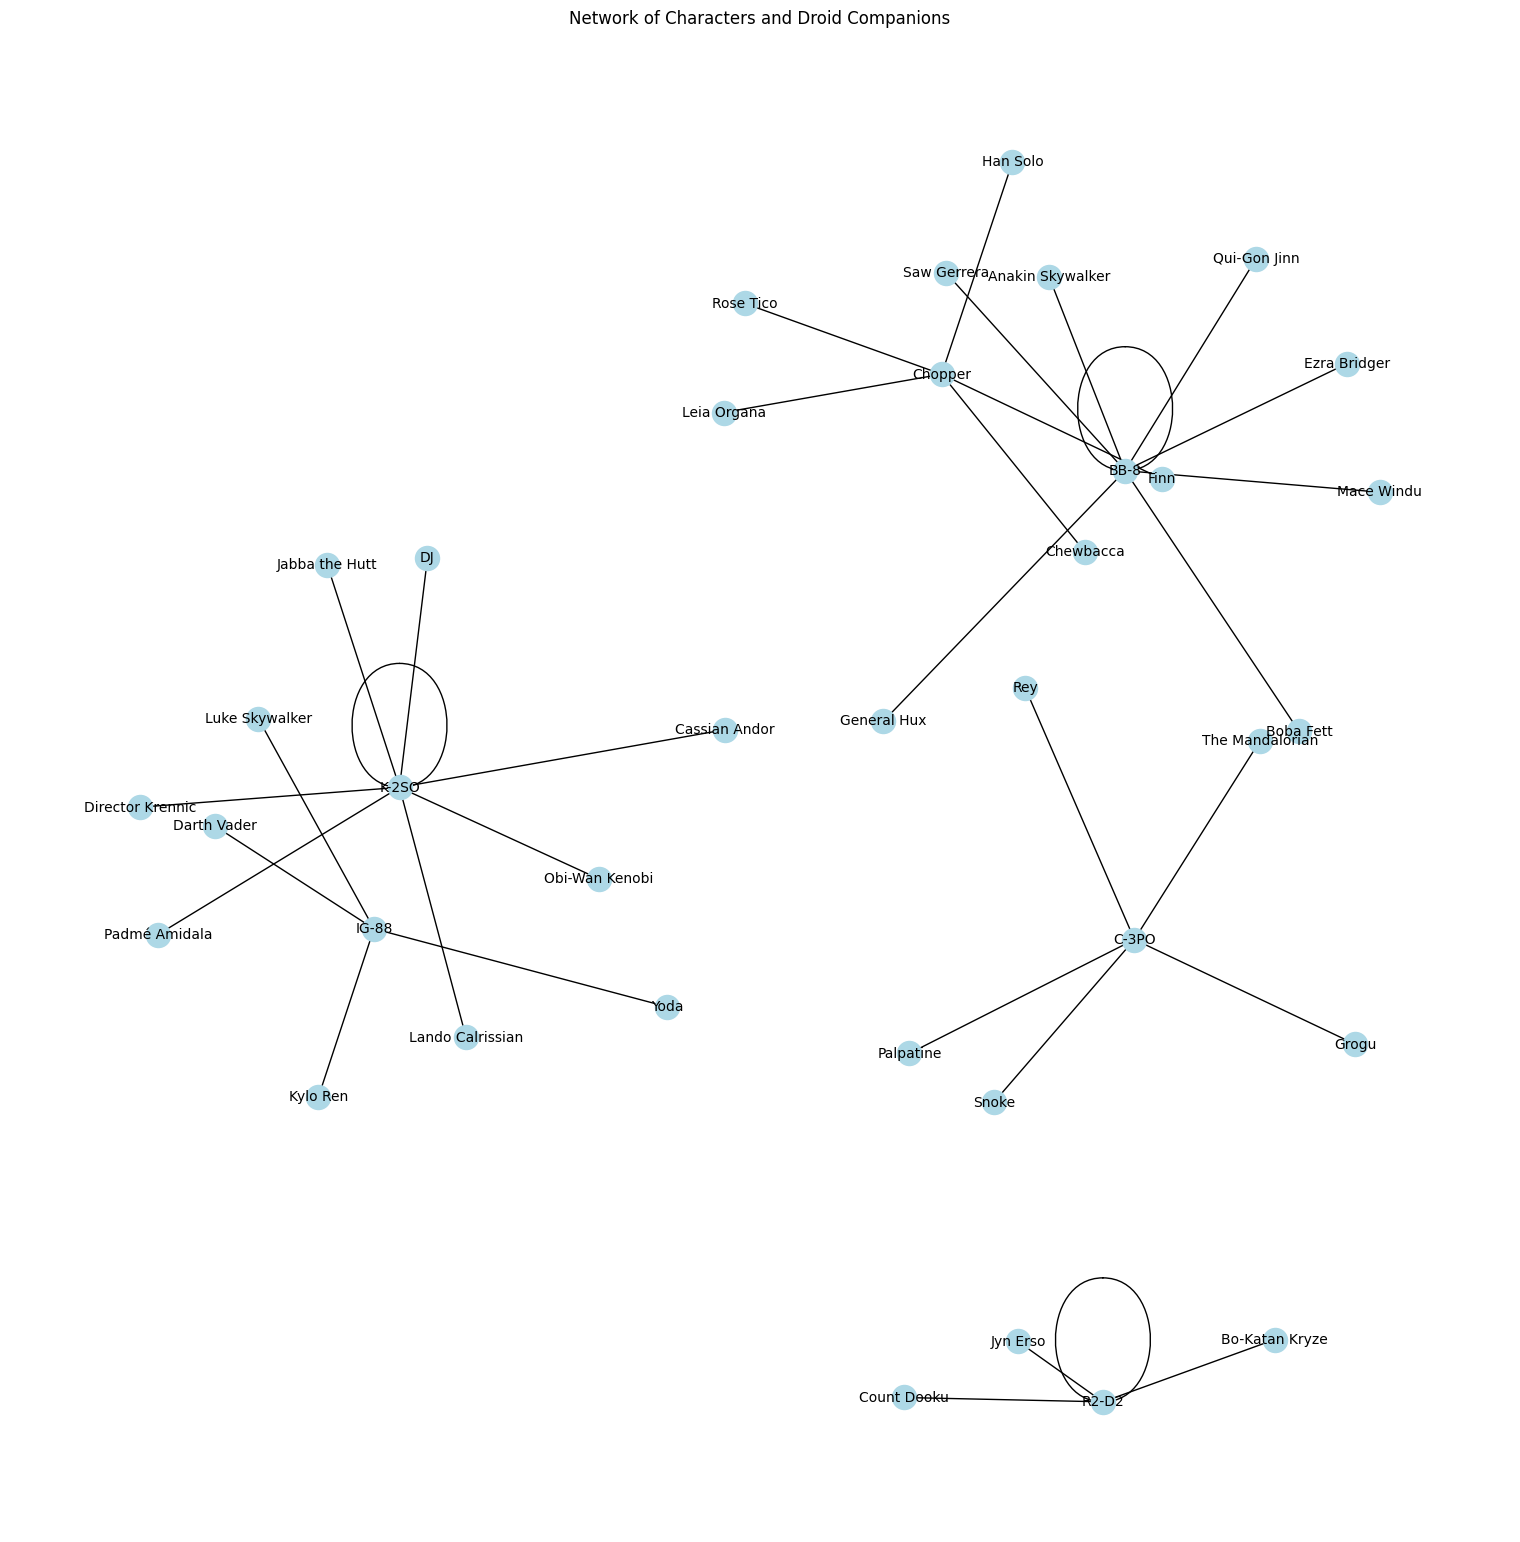

In [39]:
# 10. Network Graph - Relações Entre Personagens e Droides Companheiros

G = nx.Graph()

for i, row in df.iterrows():
    if pd.notna(row['Droid Companion']):
        G.add_node(row['Name'], label='Character')
        G.add_node(row['Droid Companion'], label='Droid')
        G.add_edge(row['Name'], row['Droid Companion'])

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=10)
plt.title('Network of Characters and Droid Companions')
plt.show()

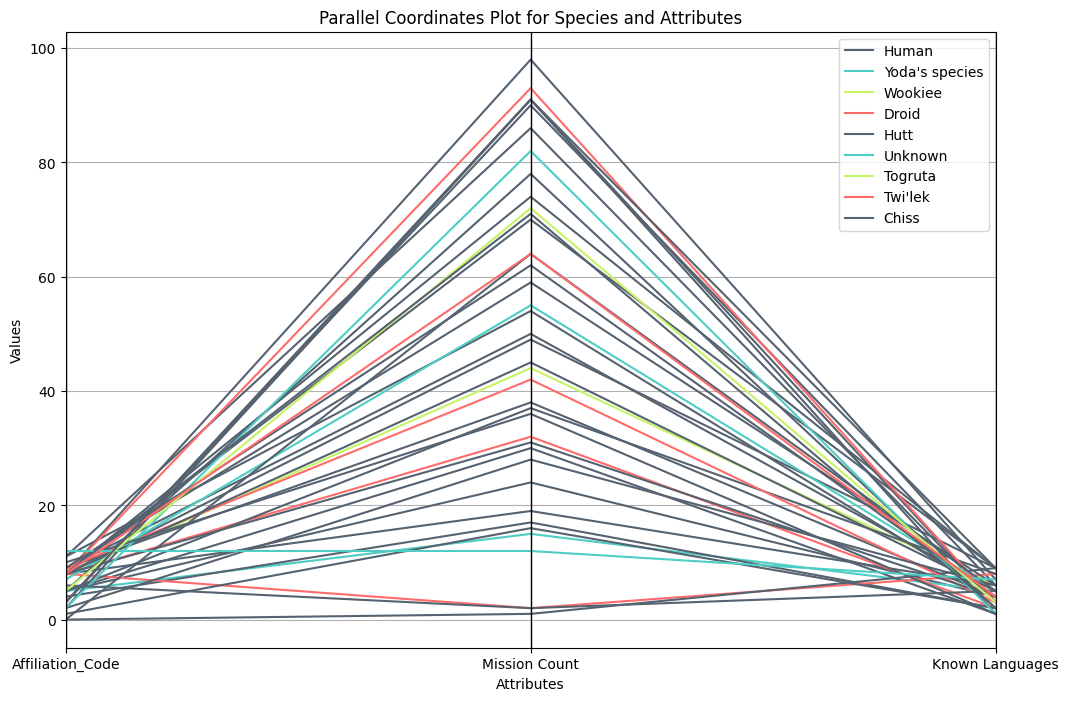

In [41]:
# 11. Parallel Coordinates Plot - Comparação Entre Atributos dos Personagens

from pandas.plotting import parallel_coordinates

df['Affiliation_Code'] = df['Affiliation'].astype('category').cat.codes

plt.figure(figsize=(12, 8))
parallel_coordinates(df[['Species', 'Affiliation_Code', 'Mission Count', 'Known Languages']], class_column='Species', color=('#556270', '#4ECDC4', '#C7F464', '#FF6B6B'))
plt.title('Parallel Coordinates Plot for Species and Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

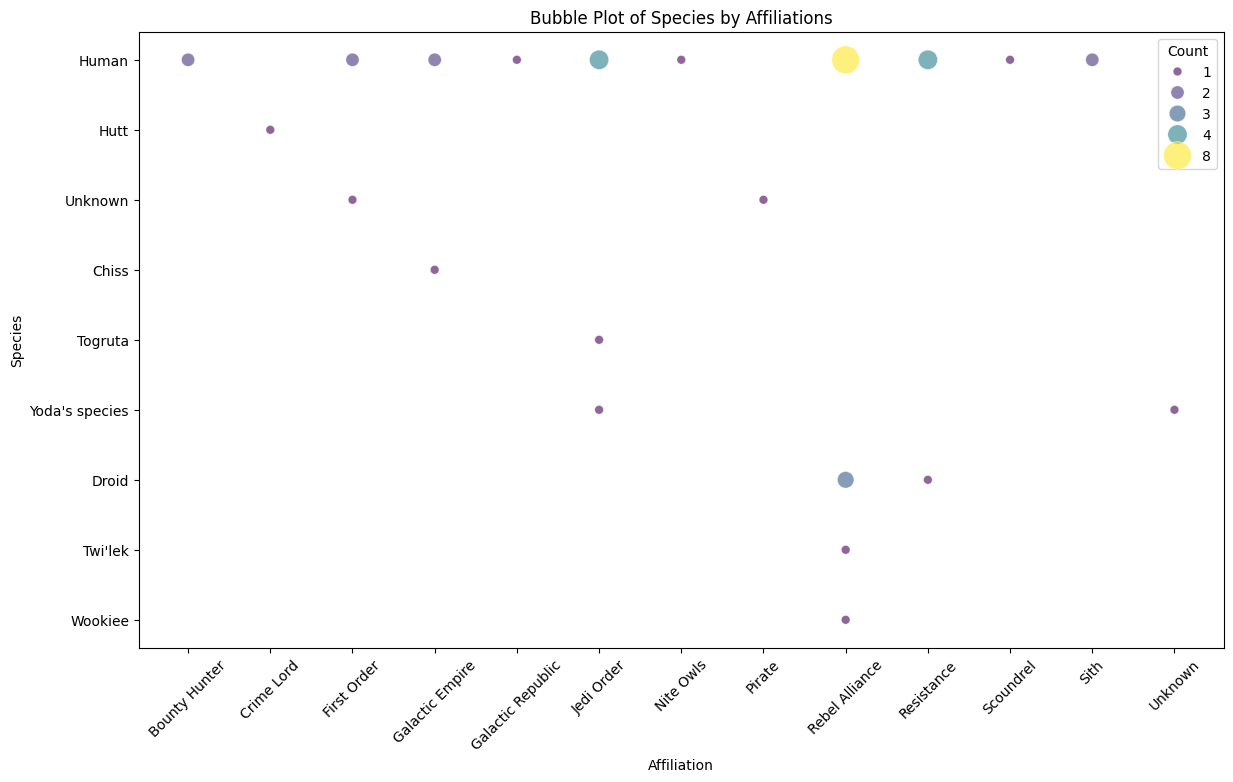

In [42]:
# 12. Bubble Chart - Comparar Afiliação e Espécie Usando Tamanho das Bolhas

species_affiliation_count = df.groupby(['Affiliation', 'Species']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.scatterplot(data=species_affiliation_count, x='Affiliation', y='Species', size='Count', hue='Count', alpha=0.6, palette='viridis', sizes=(40, 400))
plt.xlabel('Affiliation')
plt.ylabel('Species')
plt.title('Bubble Plot of Species by Affiliations')
plt.xticks(rotation=45)
plt.show()

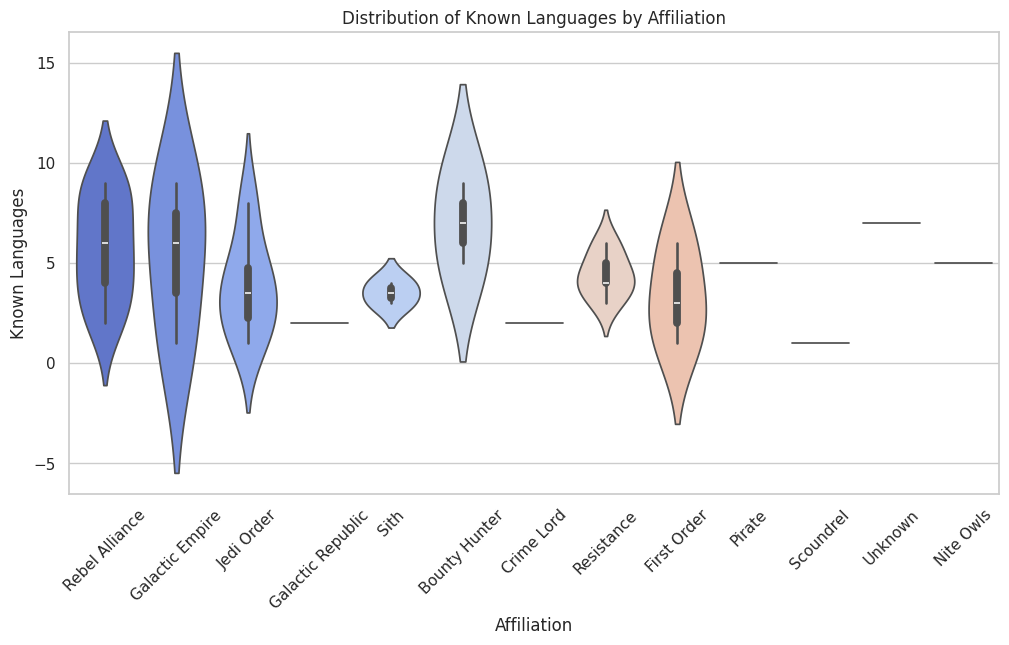

In [60]:
# 13. Violin Plot - Distribuição de Conhecimento de Línguas por Afiliação

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Affiliation', y='Known Languages', hue='Affiliation', palette='coolwarm', split=False, dodge=False)
plt.xlabel('Affiliation')
plt.ylabel('Known Languages')
plt.title('Distribution of Known Languages by Affiliation')
plt.xticks(rotation=45)

plt.legend([], [], frameon=False)

plt.show()

<ipython-input-27-bb6ea7e66a1f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




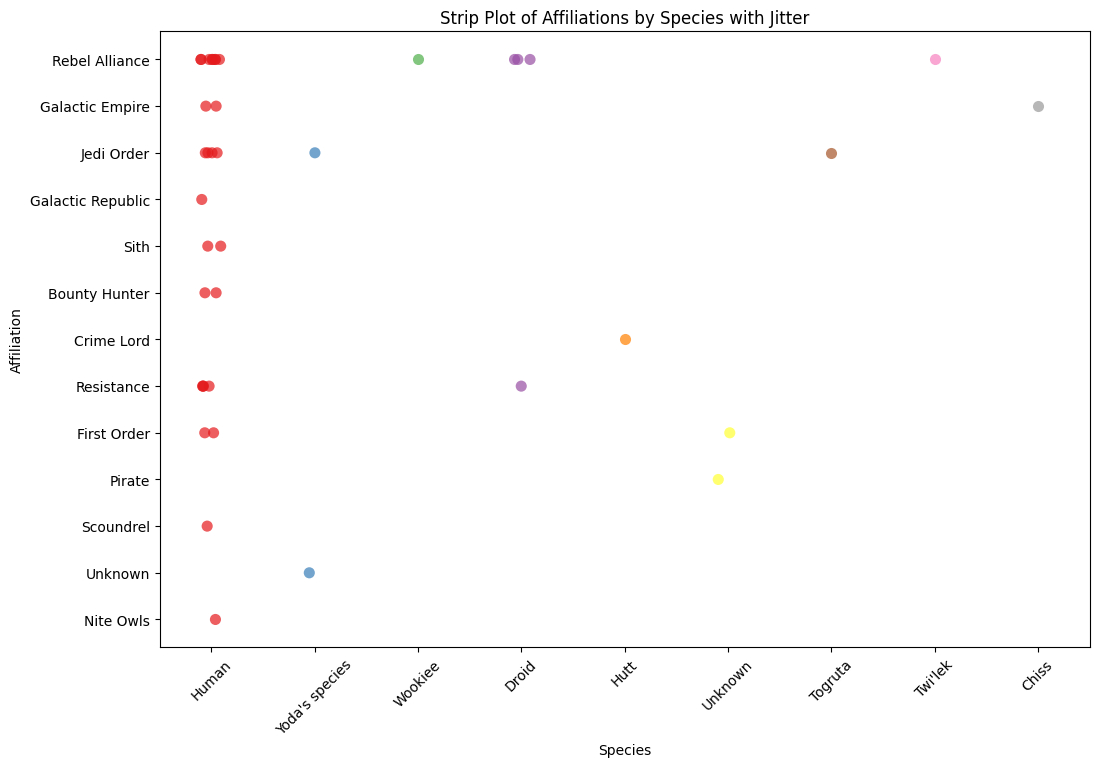

In [ ]:
# 14. Strip Plot com Jitter - Afiliações por Espécies

plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Species', y='Affiliation', jitter=True, size=8, alpha=0.7, palette='Set1')
plt.xlabel('Species')
plt.ylabel('Affiliation')
plt.title('Strip Plot of Affiliations by Species with Jitter')
plt.xticks(rotation=45)
plt.show()

In [43]:
# 15. Donut Chart - Distribuição de Espécies

species_count = df['Species'].value_counts()
fig = px.pie(df, names='Species', hole=0.3, title='Distribution of Characters by Species',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

<ipython-input-29-48879e19eae9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




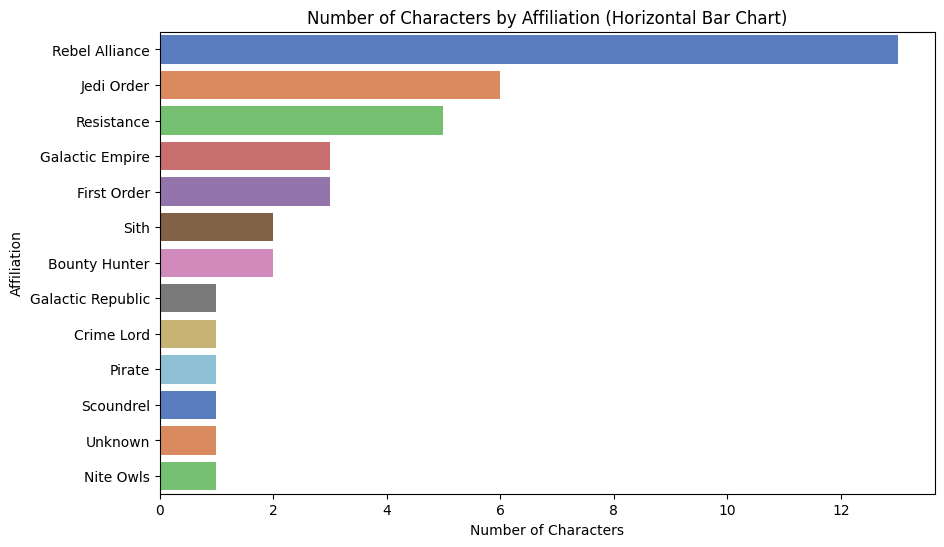

In [ ]:
# 16. Horizontal Bar Chart - Número de Personagens por Afiliação

plt.figure(figsize=(10, 6))
affiliation_count = df['Affiliation'].value_counts()
sns.barplot(y=affiliation_count.index, x=affiliation_count.values, palette='muted')
plt.xlabel('Number of Characters')
plt.ylabel('Affiliation')
plt.title('Number of Characters by Affiliation (Horizontal Bar Chart)')
plt.show()

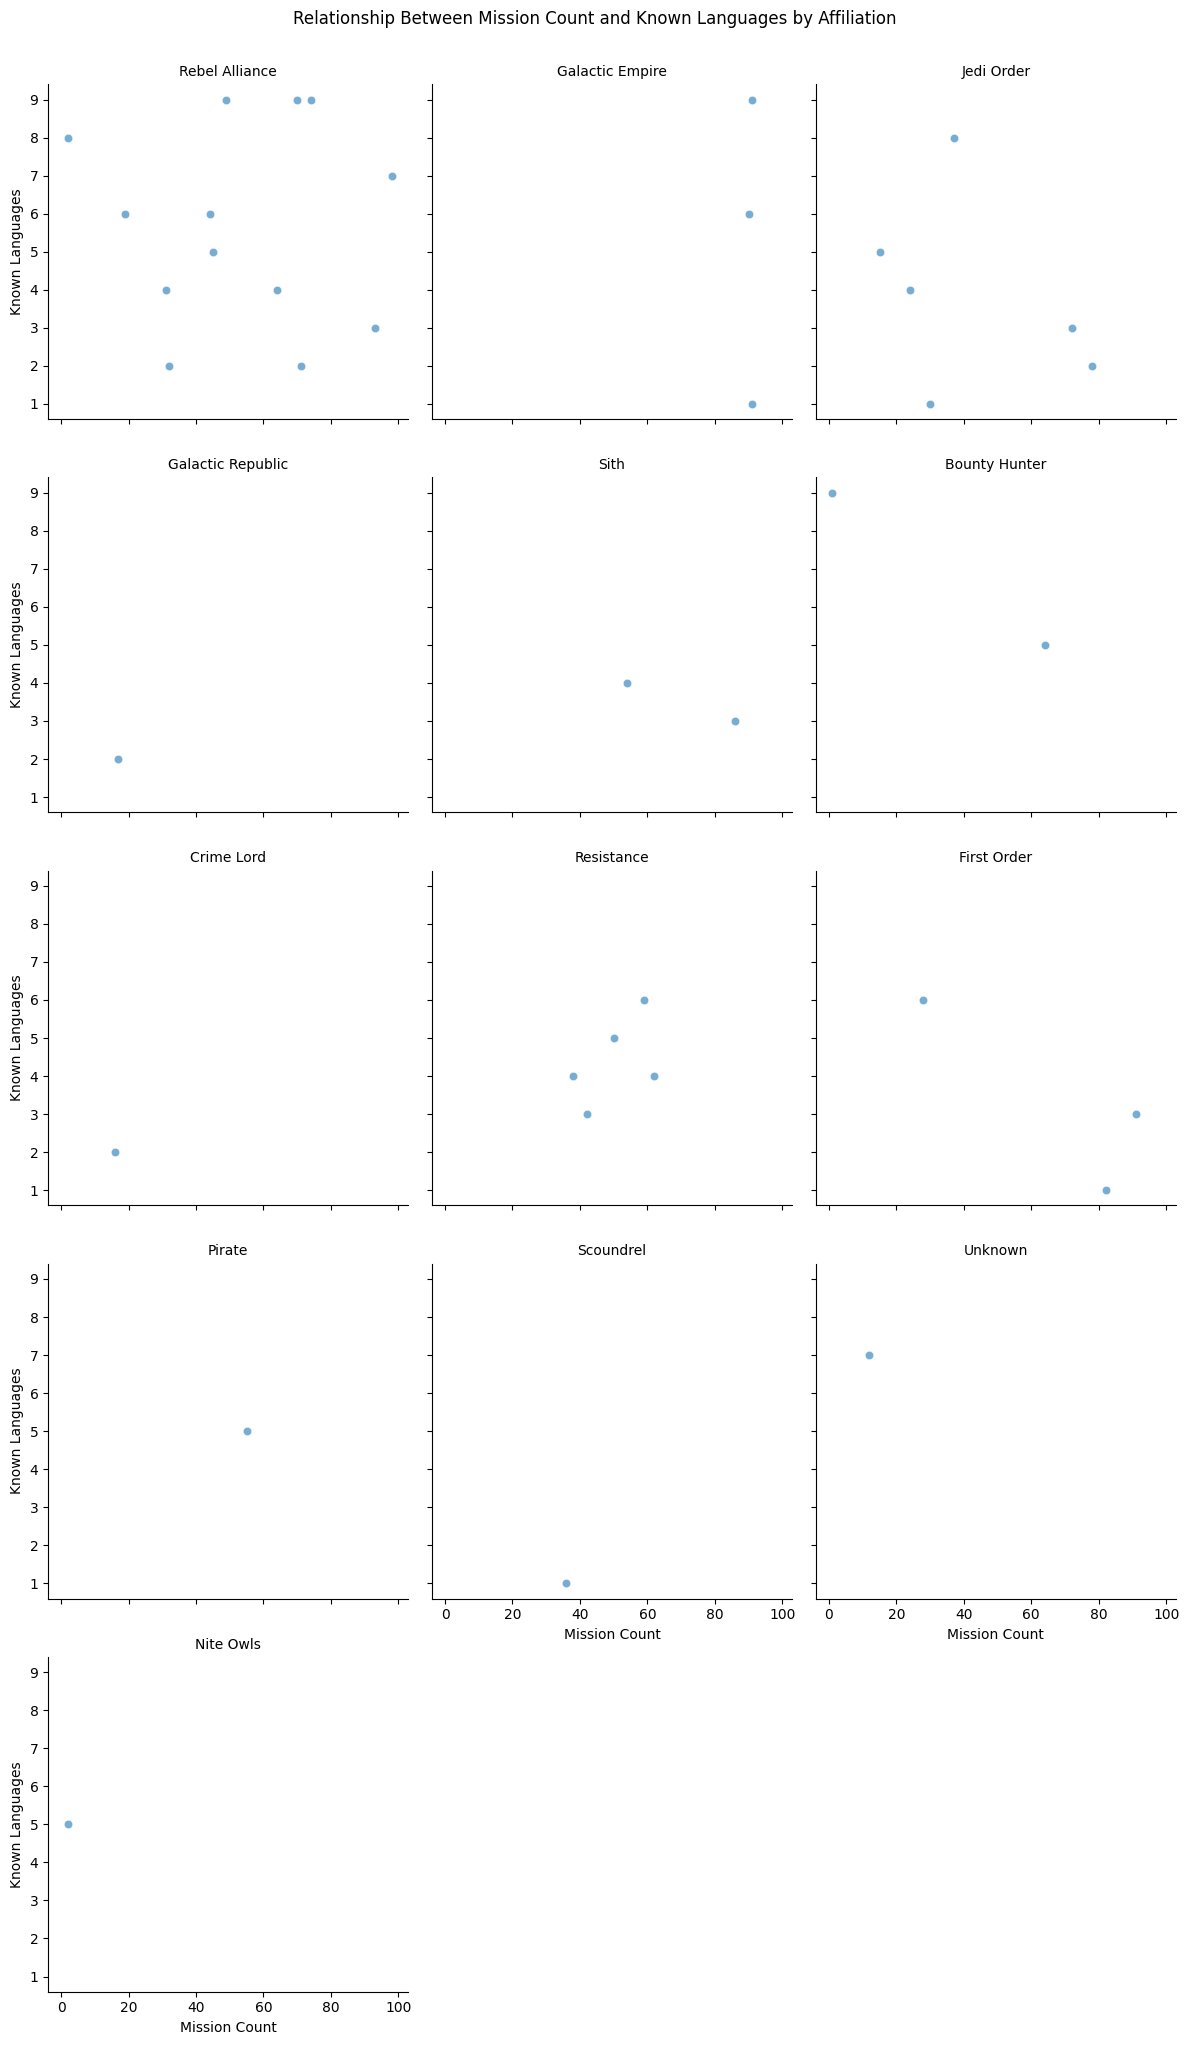

In [ ]:
# 17. Trellis Chart (FacetGrid) - Relação Entre Número de Missões e Conhecimento de Línguas por Afiliação

g = sns.FacetGrid(df, col='Affiliation', col_wrap=3, height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x='Mission Count', y='Known Languages', alpha=0.6)
g.set_axis_labels("Mission Count", "Known Languages")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Relationship Between Mission Count and Known Languages by Affiliation', y=1.02)
plt.show()

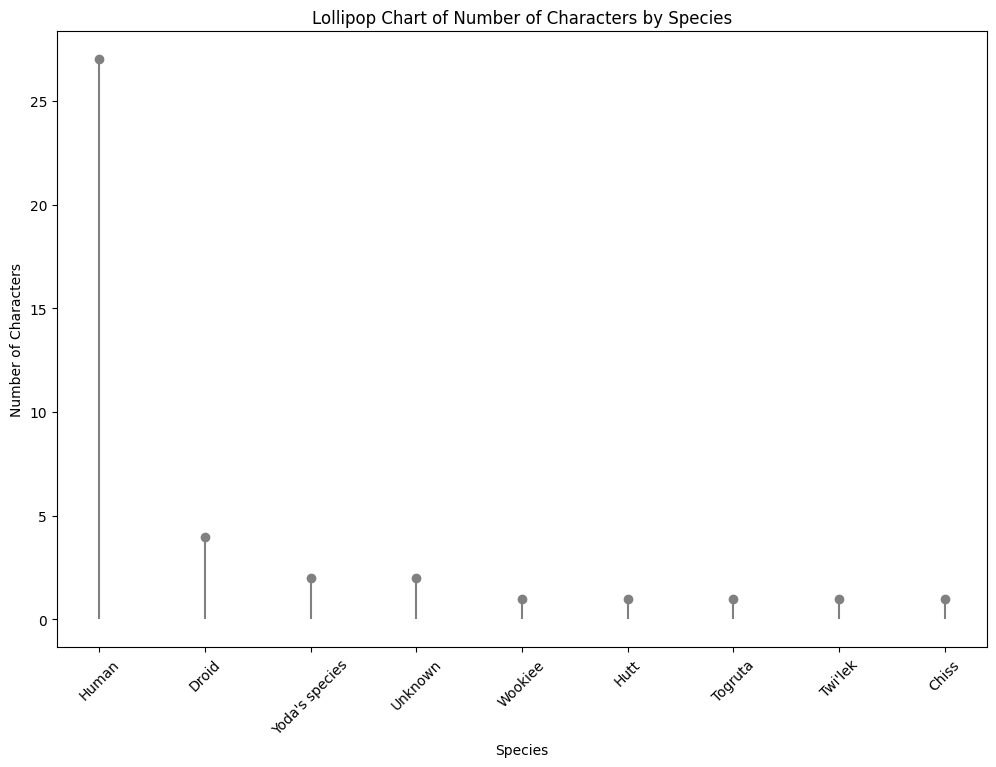

In [44]:
# 18. Lollipop Chart - Comparar Número de Personagens por Espécie

species_count = df['Species'].value_counts()

plt.figure(figsize=(12, 8))
plt.stem(species_count.index, species_count.values, linefmt='grey', markerfmt='o', basefmt=' ')
plt.xlabel('Species')
plt.ylabel('Number of Characters')
plt.title('Lollipop Chart of Number of Characters by Species')
plt.xticks(rotation=45)
plt.show()

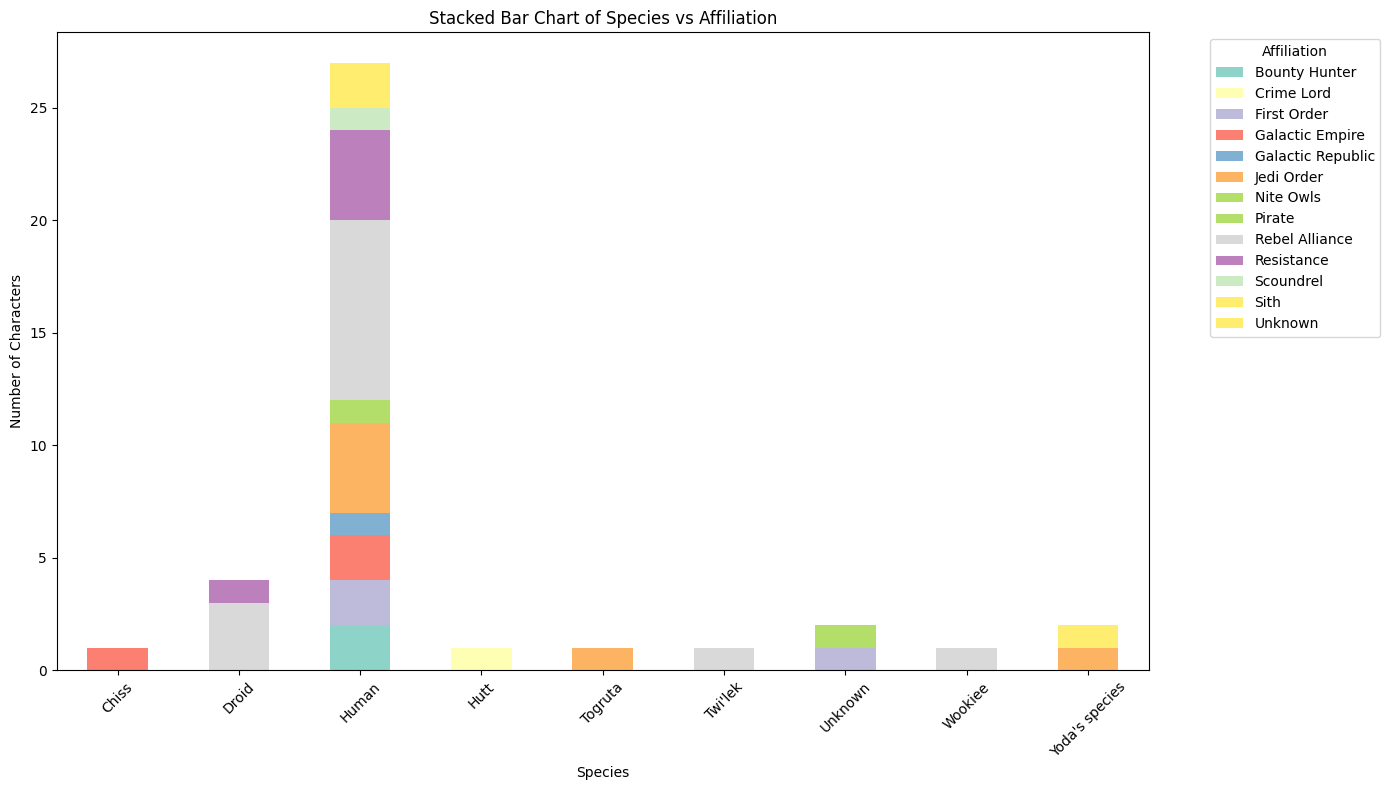

In [45]:
# 19. Marimekko Chart - Relação Entre Espécie e Afiliação

species_affiliation_ct = pd.crosstab(df['Species'], df['Affiliation'])

species_affiliation_ct.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
plt.xlabel('Species')
plt.ylabel('Number of Characters')
plt.title('Stacked Bar Chart of Species vs Affiliation')
plt.xticks(rotation=45)
plt.legend(title='Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 20. Funnel Chart - Introdução dos Personagens ao Longo dos Filmes

first_appearance_count = df['First Appearance'].value_counts()

fig = px.funnel(first_appearance_count, x=first_appearance_count.values, y=first_appearance_count.index,
                title='Introduction of Characters Across Movies')
fig.show()

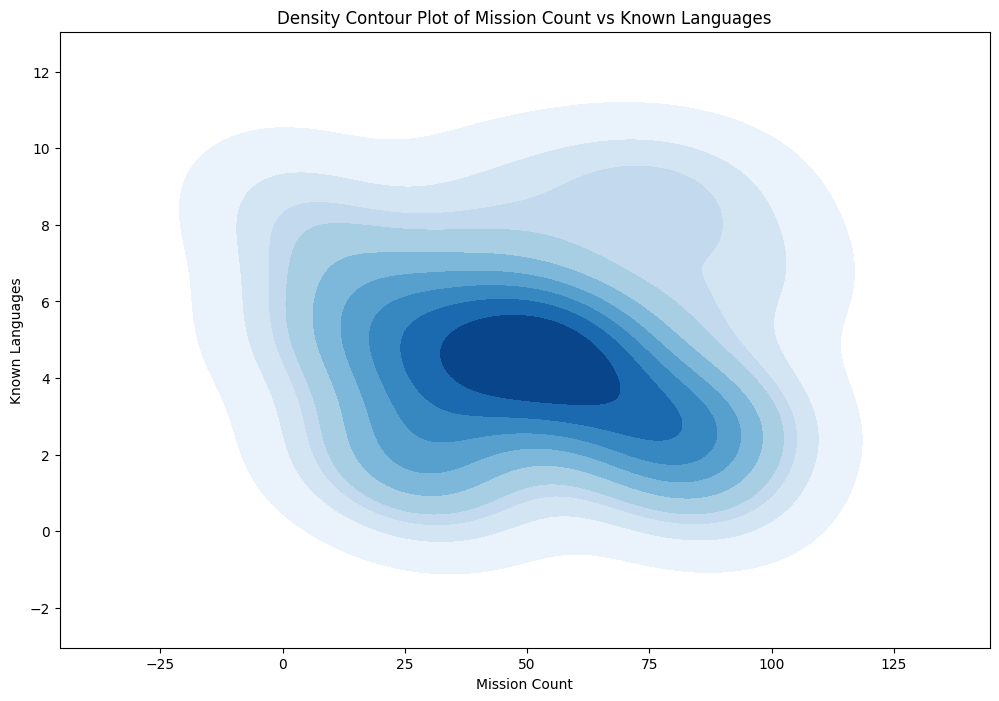

In [46]:
# 21. Density Contour Plot - Visualizar Concentração de Atributos

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Mission Count', y='Known Languages', cmap='Blues', fill=True)
plt.xlabel('Mission Count')
plt.ylabel('Known Languages')
plt.title('Density Contour Plot of Mission Count vs Known Languages')
plt.show()

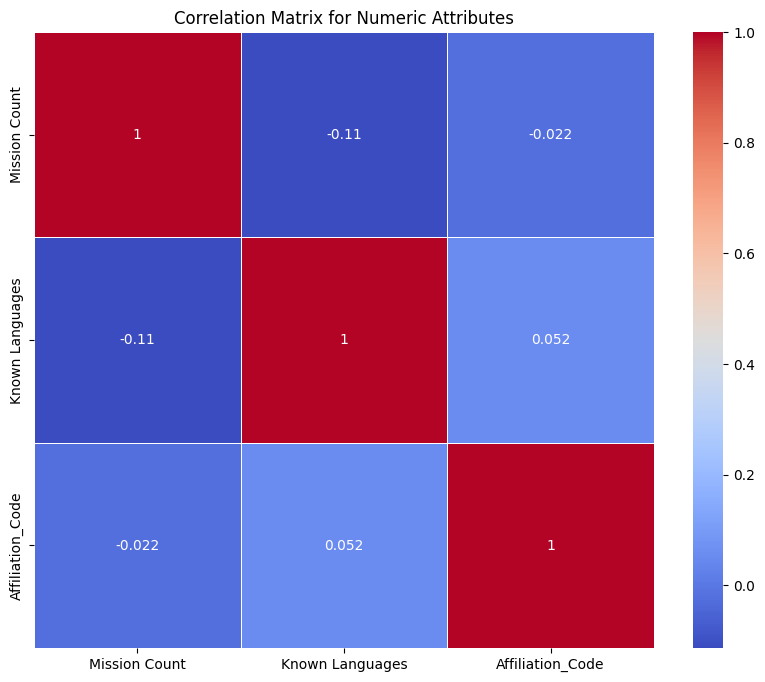

In [47]:
# 22. Correlograma (Correlation Matrix Plot)

numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Attributes')
plt.show()

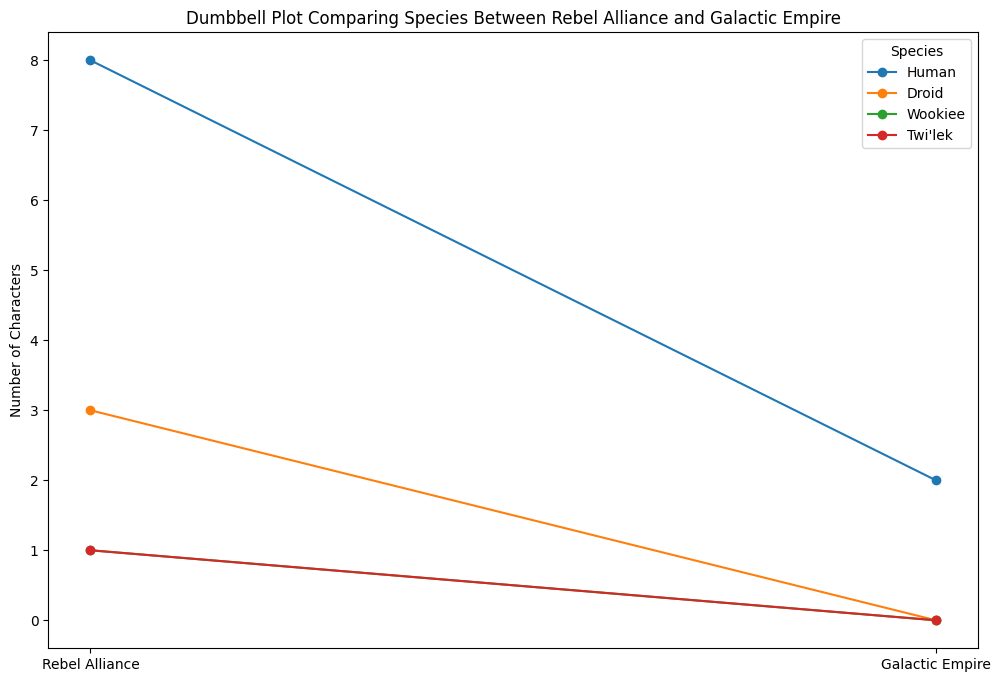

In [48]:
# 23. Dumbbell Plot - Comparar o Número de Personagens por Espécie Entre Dois Grupos

species_rebels = df[df['Affiliation'] == 'Rebel Alliance']['Species'].value_counts()
species_empire = df[df['Affiliation'] == 'Galactic Empire']['Species'].value_counts()

plt.figure(figsize=(12, 8))
for i, species in enumerate(species_rebels.index):
    plt.plot([0, 1], [species_rebels[species], species_empire.get(species, 0)], 'o-', label=species)
plt.xticks([0, 1], ['Rebel Alliance', 'Galactic Empire'])
plt.ylabel('Number of Characters')
plt.title('Dumbbell Plot Comparing Species Between Rebel Alliance and Galactic Empire')
plt.legend(title='Species', loc='best')
plt.show()

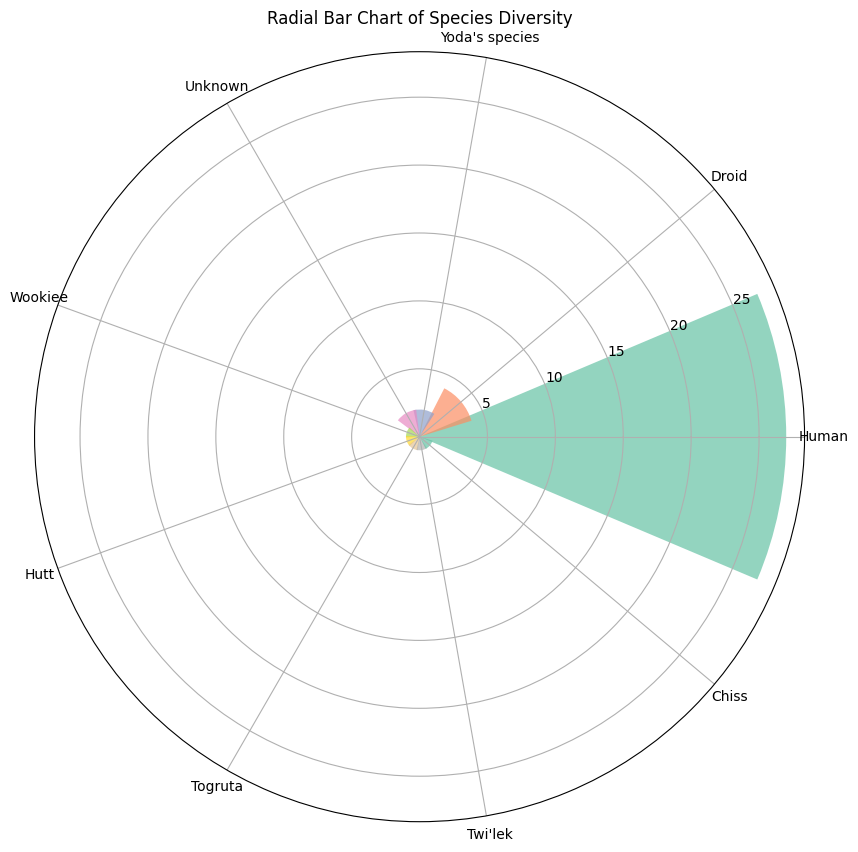

In [49]:
# 24. Radial Bar Chart - Comparação dos Atributos dos Personagens

from math import pi

species_count = df['Species'].value_counts()

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
theta = np.linspace(0.0, 2 * pi, len(species_count), endpoint=False)
radii = species_count.values
bars = ax.bar(theta, radii, color=sns.color_palette("Set2", len(species_count)), alpha=0.7, align='center')

ax.set_xticks(theta)
ax.set_xticklabels(species_count.index, fontsize=10, rotation=90)
plt.title('Radial Bar Chart of Species Diversity', pad=20)
plt.show()

In [50]:
# 25. Streamgraph - Evolução da Distribuição de Espécies ao Longo dos Filmes

df_filtered = df[df['First Appearance'].notna()]

species_evolution = df_filtered.groupby(['First Appearance', 'Species']).size().reset_index(name='Count')

fig = px.area(species_evolution,
              x='First Appearance',
              y='Count',
              color='Species',
              title='Streamgraph - Evolution of Species Diversity Across Star Wars Movies',
              line_group='Species')

fig.update_layout(legend_title_text='Species', xaxis_title='First Appearance', yaxis_title='Number of Characters')
fig.show()

In [9]:
# 26. Icicle Chart - Análise de Hierarquia de Atributos do Universo Star Wars

data = df.groupby(['Affiliation', 'Species', 'Homeworld']).size().reset_index(name='Count')

fig = px.icicle(
    data,
    path=['Affiliation', 'Species', 'Homeworld'],
    values='Count',
    title='Icicle Chart - Análise de Afiliação, Espécie e Planeta Natal dos Personagens',
    color='Affiliation'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

In [51]:
# 27. Chord Diagram 3D - Visualização de Conexões em Três Dimensões Entre Espécies, Afiliações e Planetas

G = nx.Graph()

for _, row in df.iterrows():
    G.add_edge(row['Species'], row['Affiliation'])
    G.add_edge(row['Affiliation'], row['Homeworld'])
    G.add_edge(row['Species'], row['Homeworld'])

pos = nx.spring_layout(G, dim=3, seed=42)

x_nodes = [pos[node][0] for node in G.nodes]
y_nodes = [pos[node][1] for node in G.nodes]
z_nodes = [pos[node][2] for node in G.nodes]

x_edges = []
y_edges = []
z_edges = []

for edge in G.edges:
    x_edges.extend([pos[edge[0]][0], pos[edge[1]][0], None])
    y_edges.extend([pos[edge[0]][1], pos[edge[1]][1], None])
    z_edges.extend([pos[edge[0]][2], pos[edge[1]][2], None])

edge_trace = go.Scatter3d(
    x=x_edges,
    y=y_edges,
    z=z_edges,
    mode='lines',
    line=dict(color='black', width=1),
    hoverinfo='none'
)

node_trace = go.Scatter3d(
    x=x_nodes,
    y=y_nodes,
    z=z_nodes,
    mode='markers+text',
    marker=dict(symbol='circle', size=6, color='skyblue'),
    text=list(G.nodes),
    hoverinfo='text'
)

layout = go.Layout(
    title='Chord Diagram 3D - Conexões Entre Espécies, Afiliações e Planetas',
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    )
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

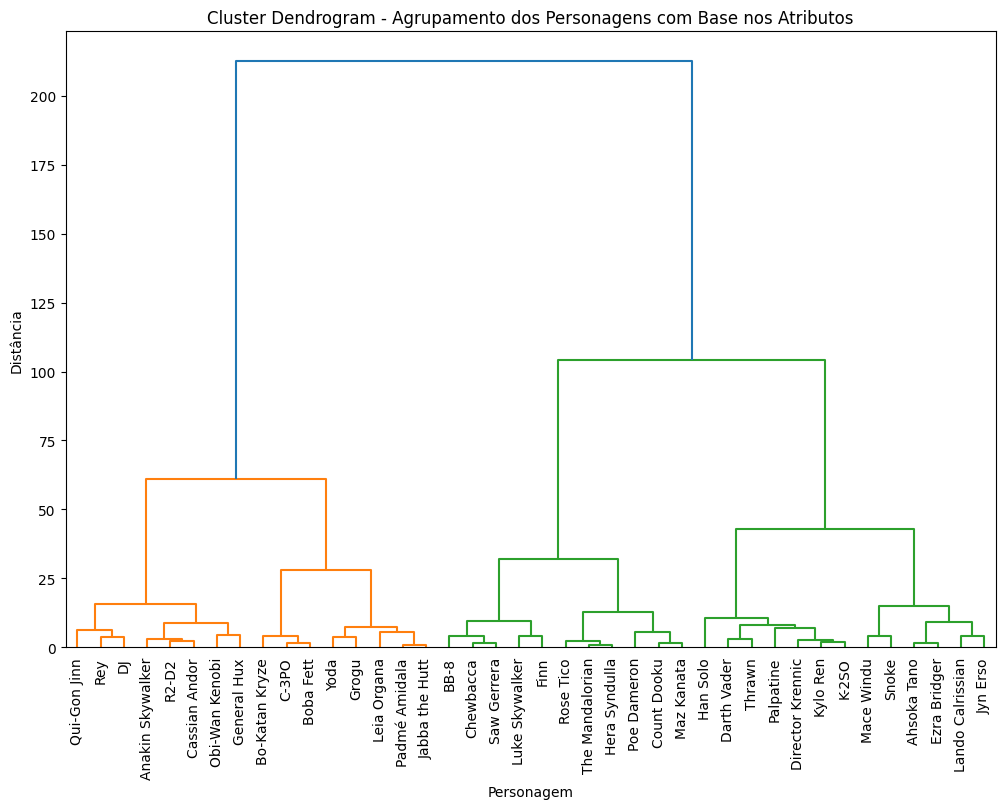

In [52]:
# 28. Cluster Dendrogram - Agrupamento dos Personagens com Base nos Atributos

from scipy.cluster.hierarchy import dendrogram, linkage

data_numeric = df.select_dtypes(include=['int64', 'float64']).dropna()

Z = linkage(data_numeric, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df['Name'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Cluster Dendrogram - Agrupamento dos Personagens com Base nos Atributos')
plt.xlabel('Personagem')
plt.ylabel('Distância')
plt.show()

<ipython-input-53-64b203ee23c4>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



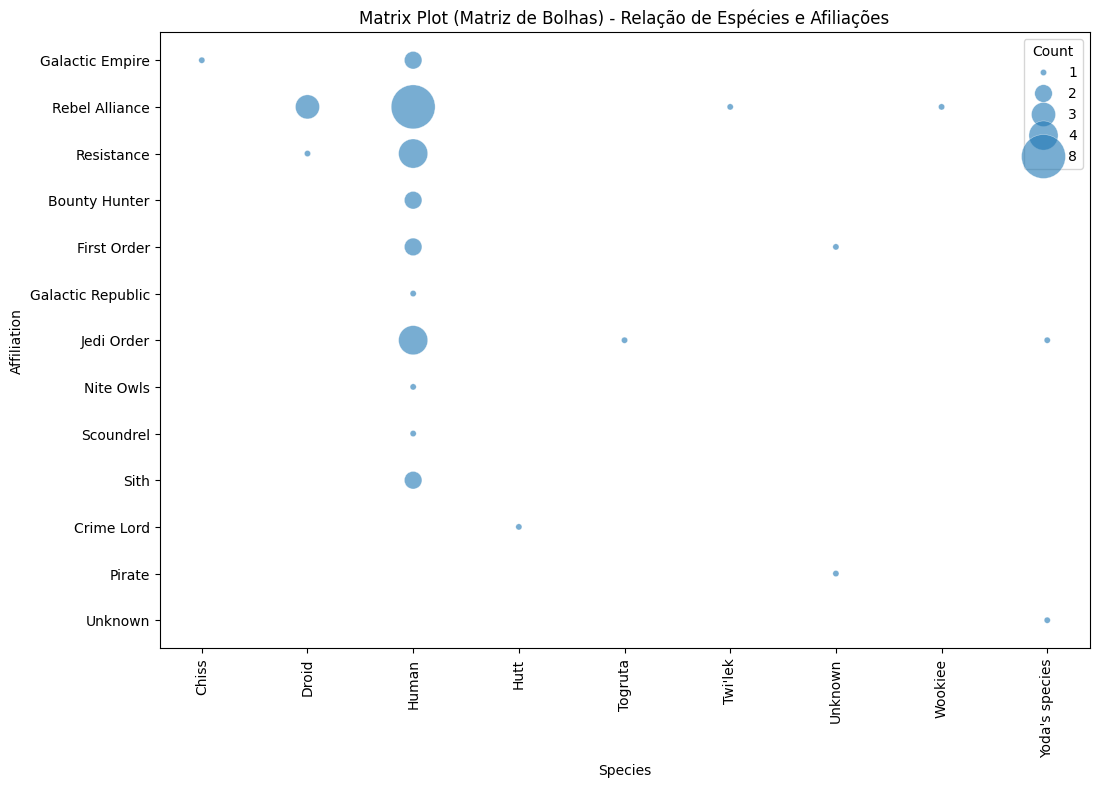

In [53]:
# 29. Matrix Plot (Matriz de Bolhas) - Relação de Personagens, Espécies e Afiliações

data_grouped = df.groupby(['Species', 'Affiliation']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Species',
    y='Affiliation',
    size='Count',
    sizes=(20, 1000),
    data=data_grouped,
    alpha=0.6,
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Matrix Plot (Matriz de Bolhas) - Relação de Espécies e Afiliações')
plt.xlabel('Species')
plt.ylabel('Affiliation')
plt.show()


In [25]:
# 30. 3D Scatter Plot - Atributos dos Personagens em um Gráfico Tridimensional

data = df[['Name', 'Mission Count', 'Known Languages', 'Affiliation']].dropna()

fig = px.scatter_3d(
    data,
    x='Mission Count',
    y='Known Languages',
    z='Affiliation',
    color='Affiliation',
    hover_name='Name',
    size='Mission Count',
    title='3D Scatter Plot - Análise dos Personagens de Star Wars'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Número de Missões',
        yaxis_title='Idiomas Conhecidos',
        zaxis_title='Afiliação'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()